In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
# Load the dataset

In [ ]:
df = pd.read_csv('Q2 Dataset.csv')
#
# Initial inspection

In [ ]:
df.head()
#

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 # Customer Churn Prediction Analysis

 **Objective:** To analyze the Telco Customer Churn dataset, build a predictive model to identify customers likely to churn, and provide actionable business recommendations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Q2 Dataset.csv')

# Initial inspection
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [ ]:
# Convert 'TotalCharges' to a numeric type. 'coerce' will turn non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Find out how many missing values were created
print(f"Number of missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Inspect the rows with missing TotalCharges
# These are typically new customers with 0 tenure.
print("\nRows with missing TotalCharges:")
print(df[df['TotalCharges'].isnull()])

# Fill missing values. Since these are new customers, 0 is a logical fill value.
df['TotalCharges'].fillna(0, inplace=True)

# Verify that the column is now numeric and has no missing values
print("\nDataset Information after cleaning TotalCharges:")
df.info()

#

Number of missing values in TotalCharges: 11

Rows with missing TotalCharges:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \


Churn Distribution:


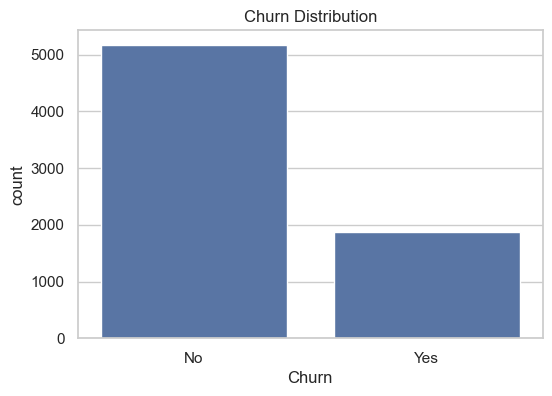

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Churn distribution
print("Churn Distribution:")
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


Distribution of Numerical Features by Churn:


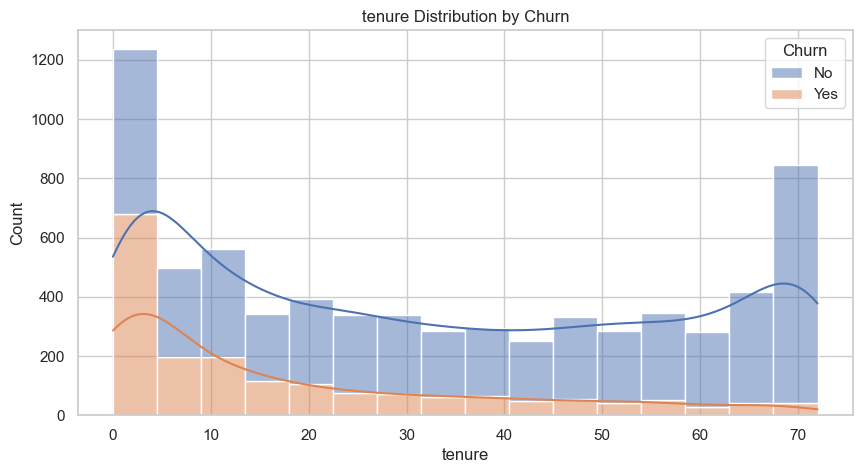

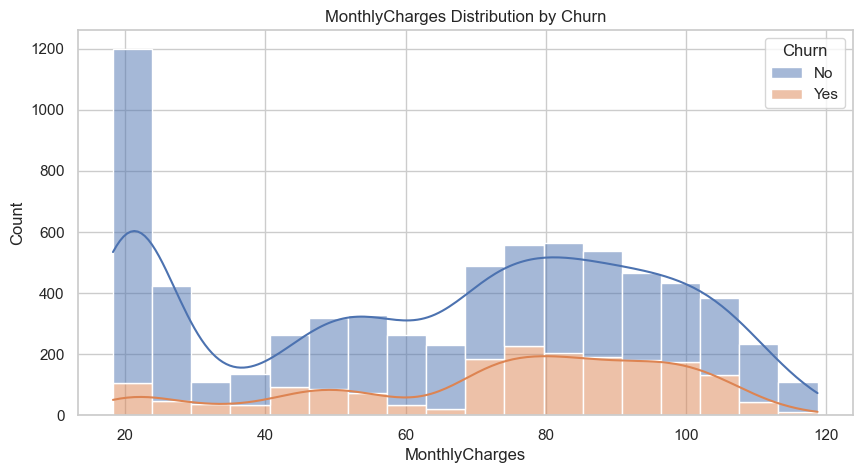

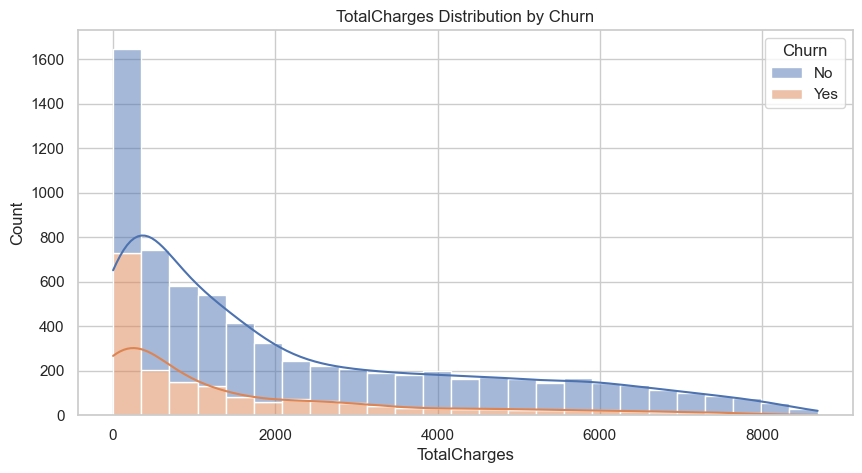

In [ ]:
# Plot distribution of numerical features for churned vs. non-churned customers
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nDistribution of Numerical Features by Churn:")
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue='Churn', multiple='stack', kde=True)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()


Churn Rate by Key Categorical Features:


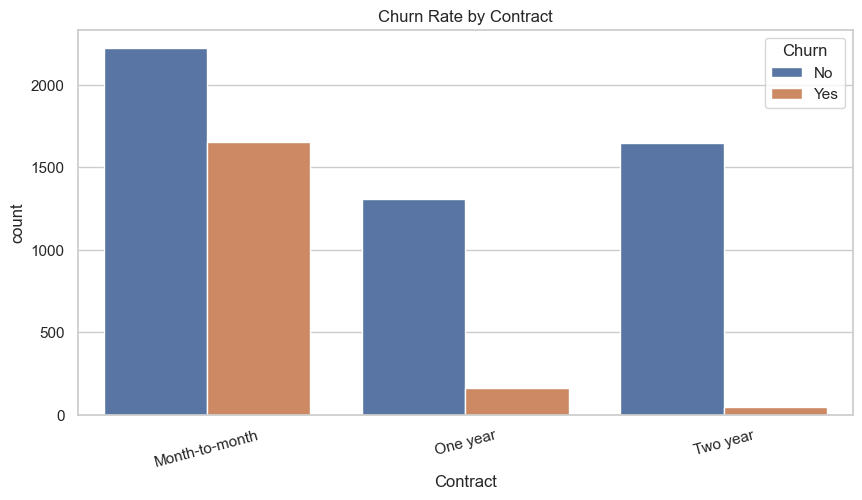

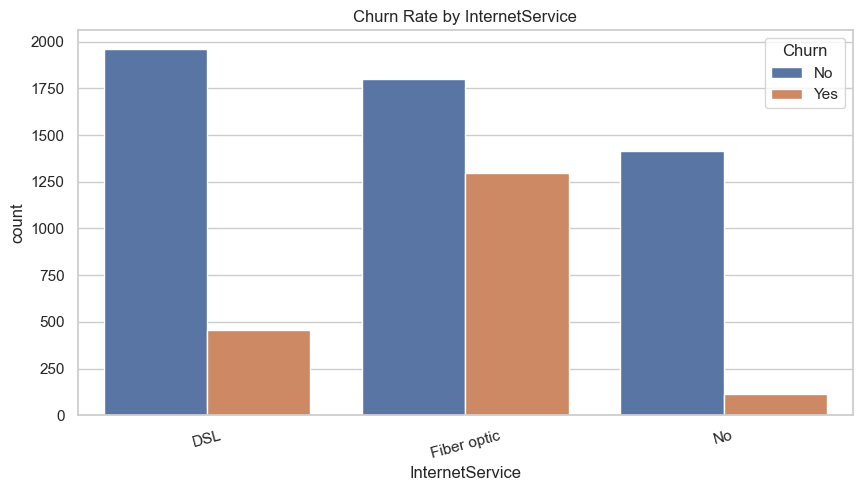

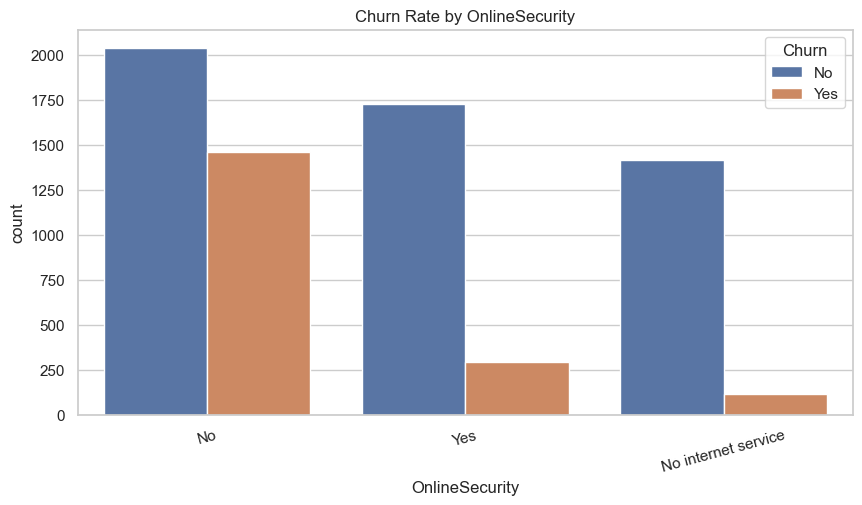

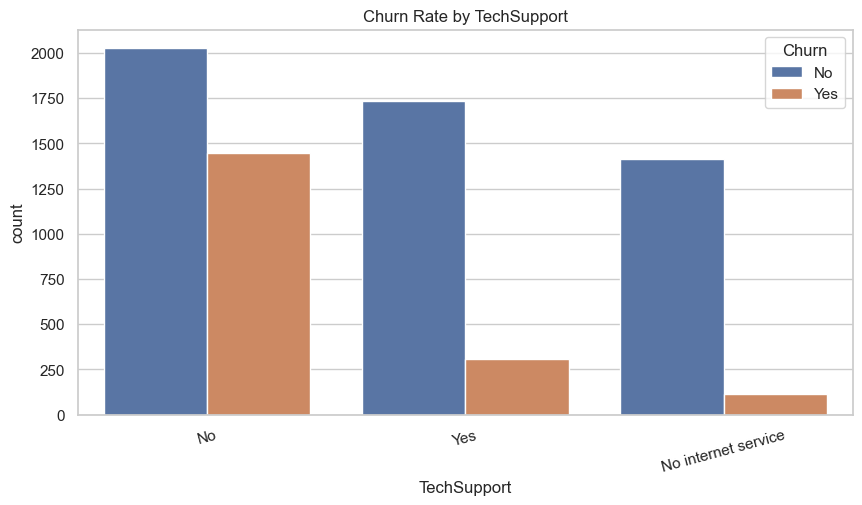

In [ ]:
# Plot churn rate for key categorical features
# We'll look at a few of the most impactful ones
categorical_features = ['Contract', 'InternetService', 'OnlineSecurity', 'TechSupport']
print("\nChurn Rate by Key Categorical Features:")
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xticks(rotation=15)
    plt.show()
#

 ## 2. Feature Engineering

 Based on the visualizations, we can see that tenure, contract type, and the services a customer has are strong indicators of churn. We will create new features to help the model capture these relationships more effectively.

In [ ]:
# 1. Create a binary feature for new customers (1 year or less)
df['IsNewCustomer'] = (df['tenure'] <= 12).astype(int)

# 2. Create a feature for total number of 'support' services
support_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['TotalSupportServices'] = df[support_services].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0})).sum(axis=1)

# 3. Create a binary feature for customers without any key support
df['NoKeySupport'] = ((df['OnlineSecurity'] == 'No') & (df['TechSupport'] == 'No')).astype(int)


# Display the new features to verify
print("DataFrame with new features (sample):")
print(df[['tenure', 'IsNewCustomer', 'OnlineSecurity', 'TechSupport', 'NoKeySupport', 'TotalSupportServices']].sample(n=10, random_state=42))
#

DataFrame with new features (sample):
      tenure  IsNewCustomer       OnlineSecurity          TechSupport  \
185        1              1                   No                   No   
2715      41              0  No internet service  No internet service   
3825      52              0  No internet service  No internet service   
1807       1              1                   No                   No   
132       67              0                   No                  Yes   
1263      68              0                   No                   No   
3732      23              0                  Yes                  Yes   
1672      72              0                  Yes                  Yes   
811       70              0                  Yes                  Yes   
2526       1              1  No internet service  No internet service   

      NoKeySupport  TotalSupportServices  
185              1                     0  
2715             0                     0  
3825             0           

 ## 3. Data Preprocessing

 Now we prepare the data for modeling. This involves:
 1. Dropping the customerID column.
 2. Encoding all categorical features into a numeric format.
 3. Separating the features (X) from the target variable (y).
 4. Scaling the numerical features.
 5. Splitting the data into training and testing sets.